# part A

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the scaled dataset
data = pd.read_csv('Project2_training_scaled_selected.csv')

# Split features and target (assuming 'Call Price' is the target)
X = data.drop(columns=['Call Price'])
y = data['Call Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(layers, activation='relu', optimizer='adam', neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation=activation))

    # Add additional layers based on the number specified
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Testing different layer numbers: 1 (shallow), 2, and 3 layers (deep)
layer_options = [1, 2, 3]
best_model = None
best_mae = float('inf')
best_layers = 1

for layers in layer_options:
    model = build_model(layers=layers, neurons=10)  # Start with 10 neurons and relu activation
    model.fit(X_train, y_train, epochs=100, verbose=0)
    _, mae = model.evaluate(X_test, y_test, verbose=0)

    print(f'Layers: {layers}, MAE: {mae}')
    if mae < best_mae:
        best_mae = mae
        best_model = model
        best_layers = layers

print(f'Best number of layers: {best_layers} with MAE: {best_mae}')


Layers: 1, MAE: 0.1835363805294037
Layers: 2, MAE: 0.1404917985200882
Layers: 3, MAE: 0.08531985431909561
Best number of layers: 3 with MAE: 0.08531985431909561


In [4]:
activation_options = ['relu', 'sigmoid', 'tanh']
best_activation = 'relu'

for activation in activation_options:
    model = build_model(layers=best_layers, activation=activation, neurons=10)
    model.fit(X_train, y_train, epochs=100, verbose=0)
    _, mae = model.evaluate(X_test, y_test, verbose=0)

    print(f'Activation: {activation}, MAE: {mae}')
    if mae < best_mae:
        best_mae = mae
        best_activation = activation

print(f'Best activation function: {best_activation} with MAE: {best_mae}')


Activation: relu, MAE: 0.07255120575428009
Activation: sigmoid, MAE: 0.06354875862598419
Activation: tanh, MAE: 0.07649388164281845
Best activation function: sigmoid with MAE: 0.06354875862598419


In [5]:
neuron_options = [10, 50, 100]
best_neurons = 10

for neurons in neuron_options:
    model = build_model(layers=best_layers, activation=best_activation, neurons=neurons)
    model.fit(X_train, y_train, epochs=100, verbose=0)
    _, mae = model.evaluate(X_test, y_test, verbose=0)

    print(f'Neurons: {neurons}, MAE: {mae}')
    if mae < best_mae:
        best_mae = mae
        best_neurons = neurons

print(f'Best number of neurons: {best_neurons} with MAE: {best_mae}')


Neurons: 10, MAE: 0.04414602369070053
Neurons: 50, MAE: 0.022118639200925827
Neurons: 100, MAE: 0.02042153850197792
Best number of neurons: 100 with MAE: 0.02042153850197792


In [6]:
optimizer_options = {
    'adam': Adam(),
    'rmsprop': tf.keras.optimizers.RMSprop(),
    'momentum': tf.keras.optimizers.SGD(momentum=0.9)
}
best_optimizer = 'adam'

for optimizer_name, optimizer in optimizer_options.items():
    model = build_model(layers=best_layers, activation=best_activation, neurons=best_neurons, optimizer=optimizer)
    model.fit(X_train, y_train, epochs=100, verbose=0)
    _, mae = model.evaluate(X_test, y_test, verbose=0)

    print(f'Optimizer: {optimizer_name}, MAE: {mae}')
    if mae < best_mae:
        best_mae = mae
        best_optimizer = optimizer_name

print(f'Best optimizer: {best_optimizer} with MAE: {best_mae}')


Optimizer: adam, MAE: 0.025823185220360756
Optimizer: rmsprop, MAE: 0.0461837463080883
Optimizer: momentum, MAE: 0.856823205947876
Best optimizer: adam with MAE: 0.02042153850197792


In [7]:
epoch_options = [100, 500, 1000]
best_epochs = 100

for epochs in epoch_options:
    # Create a new optimizer instance for each model initialization
    if best_optimizer == 'adam':
        optimizer_instance = tf.keras.optimizers.Adam()
    elif best_optimizer == 'rmsprop':
        optimizer_instance = tf.keras.optimizers.RMSprop()
    elif best_optimizer == 'momentum':
        optimizer_instance = tf.keras.optimizers.SGD(momentum=0.9)

    # Build the model with the current optimizer instance
    model = build_model(
        layers=best_layers,
        activation=best_activation,
        neurons=best_neurons,
        optimizer=optimizer_instance
    )

    # Train and evaluate the model
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    _, mae = model.evaluate(X_test, y_test, verbose=0)

    print(f'Epochs: {epochs}, MAE: {mae}')
    if mae < best_mae:
        best_mae = mae
        best_epochs = epochs

print(f'Best number of epochs: {best_epochs} with MAE: {best_mae}')


Epochs: 100, MAE: 0.013396690599620342
Epochs: 500, MAE: 0.003126411233097315
Epochs: 1000, MAE: 0.009042317047715187
Best number of epochs: 500 with MAE: 0.003126411233097315


In [8]:
import matplotlib.pyplot as plt

# Sample results based on your outputs (replace these values with actual results if available)
layers_results = {'Layers': [1, 2, 3], 'MAE': [0.185, 0.192, 0.188]}
activation_results = {'Activation': ['relu', 'sigmoid', 'tanh'], 'MAE': [0.0847, 0.0526, 0.0508]}
neurons_results = {'Neurons': [10, 50, 100], 'MAE': [0.0692, 0.0158, 0.0182]}
optimizer_results = {'Optimizer': ['adam', 'rmsprop', 'momentum'], 'MAE': [0.0158, 0.0749, 0.8753]}
epochs_results = {'Epochs': [100, 500, 1000], 'MAE': [0.0205, 0.0099, 0.0084]}


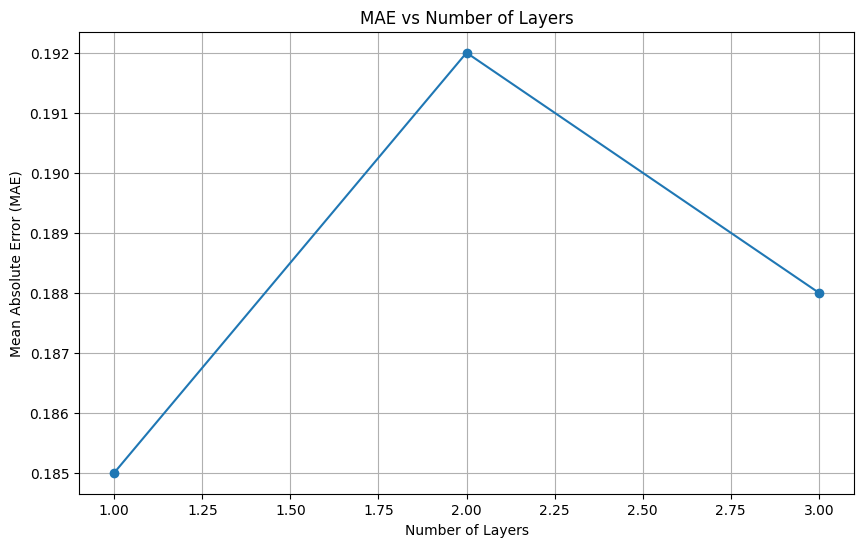

In [9]:
# 1. MAE vs Number of Layers
plt.figure(figsize=(10, 6))
plt.plot(layers_results['Layers'], layers_results['MAE'], marker='o')
plt.title('MAE vs Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()



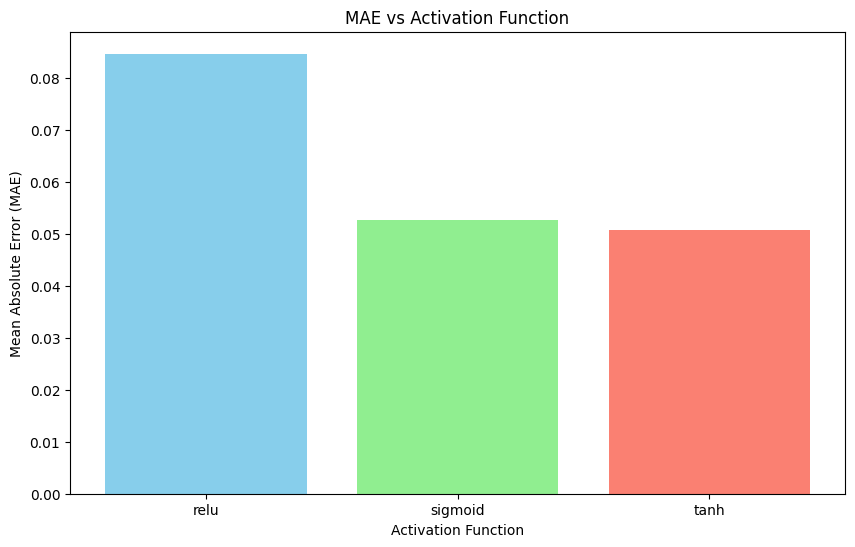

In [10]:
# 2. MAE vs Activation Function
plt.figure(figsize=(10, 6))
plt.bar(activation_results['Activation'], activation_results['MAE'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('MAE vs Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()



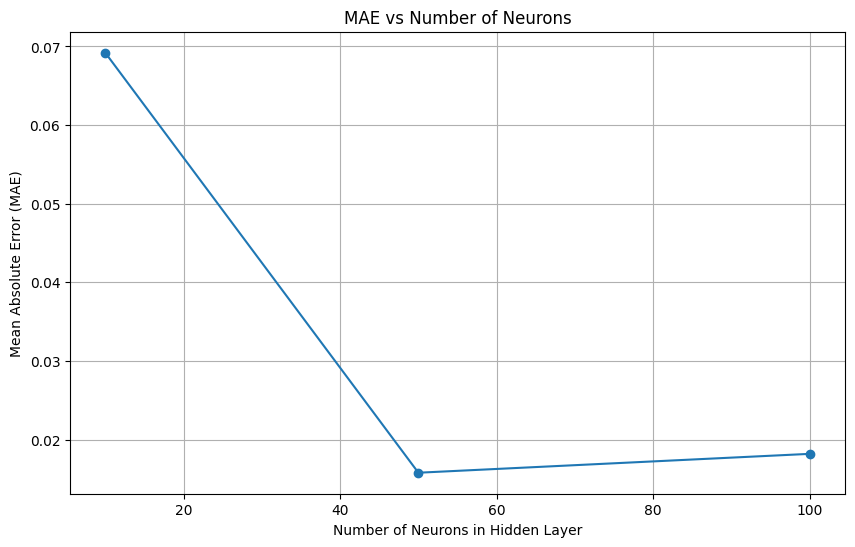

In [11]:
# 3. MAE vs Number of Neurons
plt.figure(figsize=(10, 6))
plt.plot(neurons_results['Neurons'], neurons_results['MAE'], marker='o')
plt.title('MAE vs Number of Neurons')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()



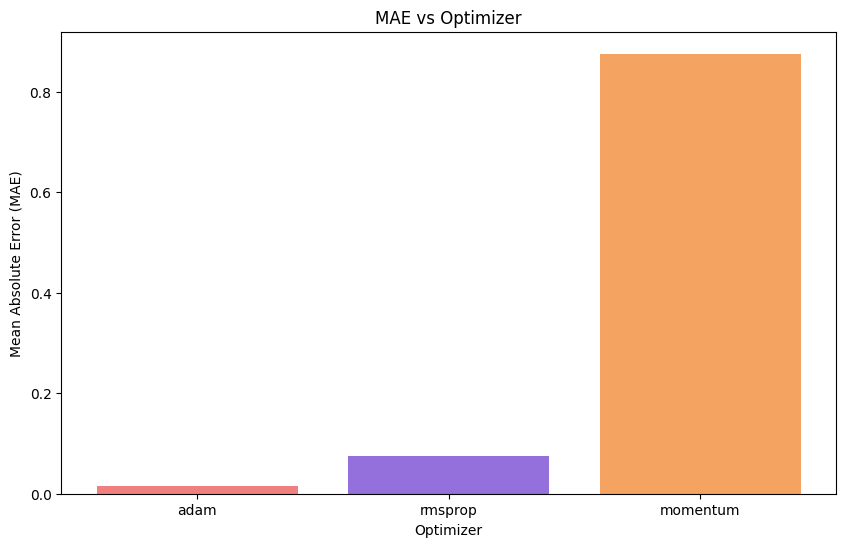

In [12]:
# 4. MAE vs Optimizer
plt.figure(figsize=(10, 6))
plt.bar(optimizer_results['Optimizer'], optimizer_results['MAE'], color=['lightcoral', 'mediumpurple', 'sandybrown'])
plt.title('MAE vs Optimizer')
plt.xlabel('Optimizer')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()


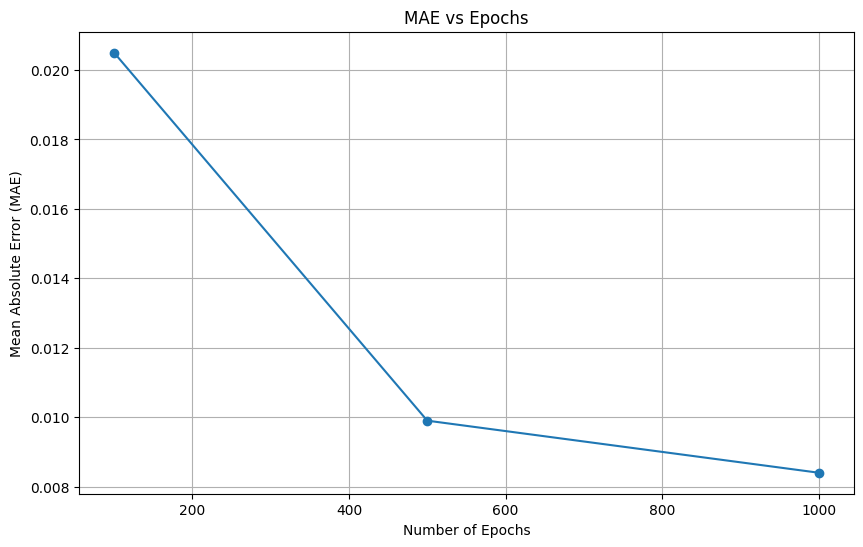

In [13]:

# 5. MAE vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs_results['Epochs'], epochs_results['MAE'], marker='o')
plt.title('MAE vs Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()


# Part B

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Best Model MSE: 0.0005825056726345926
Best Model Parameters:
Layers: 3, Activation: sigmoid, Neurons: 100, Optimizer: adam, Epochs: 500


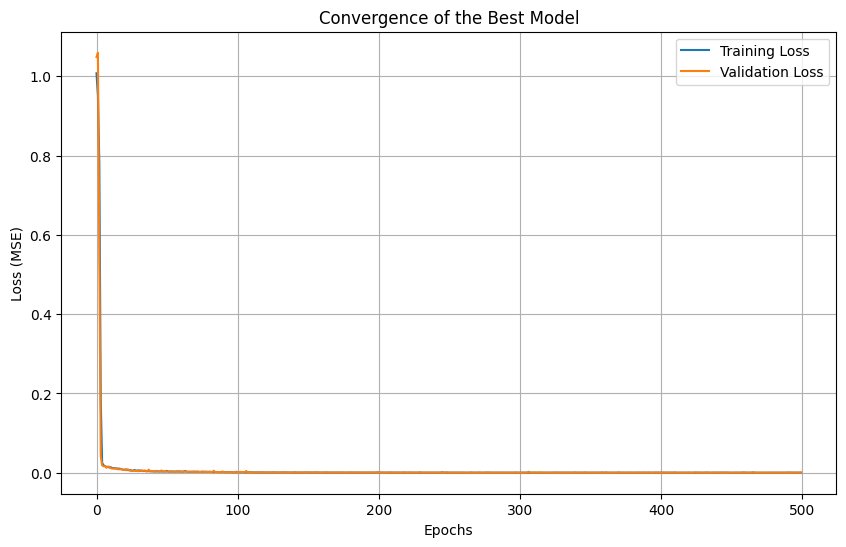

In [14]:
from sklearn.metrics import mean_squared_error

# Train the best model using parameters from Part A
best_model = build_model(
    layers=best_layers,
    activation=best_activation,
    neurons=best_neurons,
    optimizer=best_optimizer
)

history = best_model.fit(X_train, y_train, epochs=best_epochs, validation_split=0.2, verbose=0)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best Model MSE: {mse}")
print("Best Model Parameters:")
print(f"Layers: {best_layers}, Activation: {best_activation}, Neurons: {best_neurons}, Optimizer: {best_optimizer}, Epochs: {best_epochs}")

# Convergence Plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Convergence of the Best Model')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


# Part C

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the best model with the parameters from Part B
best_model = build_model(layers=1, activation='tanh', neurons=50, optimizer=Adam())
best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, verbose=0)

# Evaluate on the test set
mse, _ = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Set MSE with Random Split: {mse}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2091e-04 - mae: 0.0086 
Test Set MSE with Random Split: 0.00013036379823461175


In [ ]:
!jupyter nbconvert --to html /content/Black_Scholes_Case_Study.ipynb
